Deep Learning<br>
Project Phase: 2<br><br>
Group Number: 15<br>
1-Saman Soelimani Roudi (400206284)<br>
2-Mehran Rahnamania (400206251)

In [ ]:
!git clone https://github.com/XL2248/MSCTD

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 13.73 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Updating files: 100% (934/934), done.


In [ ]:
!ls

MSCTD  sample_data


In [ ]:
!cp MSCTD/MSCTD_data/ende/english_*.txt .
!cp MSCTD/MSCTD_data/ende/image_index_*.txt .
!cp MSCTD/MSCTD_data/ende/sentiment_*.txt .

In [ ]:
!ls

english_dev.txt      image_index_test.txt   sentiment_dev.txt
english_test.txt     image_index_train.txt  sentiment_test.txt
english_train.txt    MSCTD		    sentiment_train.txt
image_index_dev.txt  sample_data


In [ ]:
!pip -q install --upgrade --no-cache-dir gdown

In [ ]:
!ls

english_dev.txt      image_index_test.txt   sentiment_dev.txt
english_test.txt     image_index_train.txt  sentiment_test.txt
english_train.txt    MSCTD		    sentiment_train.txt
image_index_dev.txt  sample_data


In [ ]:
!gdown --id 1zOasrwm9gTy1C-wdwSq_v3haZ7o0juZU

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zOasrwm9gTy1C-wdwSq_v3haZ7o0juZU
To: /content/train_ende.zip
100% 2.90G/2.90G [00:58<00:00, 49.7MB/s]


In [ ]:
!ls

english_dev.txt      image_index_test.txt   sentiment_dev.txt
english_test.txt     image_index_train.txt  sentiment_test.txt
english_train.txt    MSCTD		    sentiment_train.txt
image_index_dev.txt  sample_data	    train_ende.zip


In [ ]:
!gdown --id 1HuvS1tOZrLAbae6Xz5ScL2HwVJF2e71N

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HuvS1tOZrLAbae6Xz5ScL2HwVJF2e71N
To: /content/dev.zip
100% 638M/638M [00:16<00:00, 39.9MB/s]


In [ ]:
!ls

dev.zip		   image_index_dev.txt	  sample_data	       train_ende.zip
english_dev.txt    image_index_test.txt   sentiment_dev.txt
english_test.txt   image_index_train.txt  sentiment_test.txt
english_train.txt  MSCTD		  sentiment_train.txt


In [ ]:
!gdown --id 1DyYZTT9y1J_Qz42EhEB5Fjp1RYDNTPsc

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DyYZTT9y1J_Qz42EhEB5Fjp1RYDNTPsc
To: /content/test.zip
100% 641M/641M [00:16<00:00, 39.2MB/s]


In [ ]:
!ls

dev.zip		   image_index_dev.txt	  sample_data	       test.zip
english_dev.txt    image_index_test.txt   sentiment_dev.txt    train_ende.zip
english_test.txt   image_index_train.txt  sentiment_test.txt
english_train.txt  MSCTD		  sentiment_train.txt


In [ ]:
!ls sample_data|head 

anscombe.json
california_housing_test.csv
california_housing_train.csv
mnist_test.csv
mnist_train_small.csv
README.md


In [ ]:
%%bash
for z in *.zip; do unzip "$z"; done

Archive:  dev.zip
  inflating: dev/0.jpg               
  inflating: dev/1.jpg               
  inflating: dev/10.jpg              
  inflating: dev/100.jpg             
  inflating: dev/1000.jpg            
  inflating: dev/1001.jpg            
  inflating: dev/1002.jpg            
  inflating: dev/1003.jpg            
  inflating: dev/1004.jpg            
  inflating: dev/1005.jpg            
  inflating: dev/1006.jpg            
  inflating: dev/1007.jpg            
  inflating: dev/1008.jpg            
  inflating: dev/1009.jpg            
  inflating: dev/101.jpg             
  inflating: dev/1010.jpg            
  inflating: dev/1011.jpg            
  inflating: dev/1012.jpg            
  inflating: dev/1013.jpg            
  inflating: dev/1014.jpg            
  inflating: dev/1015.jpg            
  inflating: dev/1016.jpg            
  inflating: dev/1017.jpg            
  inflating: dev/1018.jpg            
  inflating: dev/1019.jpg            
  inflating: dev/102.jpg        

#Creating MSCTDataset Class#

In [ ]:
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import pandas as pd
from numpy import asarray as ToNumpy
import numpy as np
import torch
import csv
import os
from PIL import Image

In [ ]:
class MSCTDataset():
    def __init__(self, text_path,image_index_path,sentiment_path,image_path,random_seed=42,transform = ToTensor()):
      self.df_text = pd.read_csv(text_path, delimiter = "\t",quoting=csv.QUOTE_NONE, header=None)
      self.df_sentiment = pd.read_csv(sentiment_path, delimiter = "\t", header=None)
      self.random_seed = random_seed
      self.transform = transform
      self.image_path = image_path
      self.df_image_index = pd.read_csv(image_index_path, delimiter = "\t", header=None)
      b=self.df_image_index[0].values
      c=[]
      for i in range(len(self.df_image_index.index)):
        c.append([int(s) for s in b[i][1:-1].split(',')])
      self.image_index_list = c
      self.image_index_np = np.array([np.array(x) for x in c],dtype=object)
    def __len__(self):
      return len(self.df_text.index)
    def __getitem__(self, idx):
      image= self.transform(Image.open(os.path.join(self.image_path ,str(idx)+'.jpg')))
      text = self.df_text.loc[idx].item()
      sentiment = self.df_sentiment.loc[idx].item()
      sample = {'text':text, 'images':image,'sentiment':sentiment}
      return sample

#Creating Training,Dev & Test Dataset Instances From MSCTDataset Class#

In [ ]:
training_data =  MSCTDataset('english_train.txt','image_index_train.txt','sentiment_train.txt','train_ende')

In [ ]:
dev_data =  MSCTDataset('english_dev.txt','image_index_dev.txt','sentiment_dev.txt','dev')

In [ ]:
test_data =  MSCTDataset('english_test.txt','image_index_test.txt','sentiment_test.txt','test')

#TF-IDF Embedding#
We fit the TF-IDF transform only on train data.<br>
This transform will ignore unseen words in dev and test data.

##Fit The TF-IDF Transform On Train Data##

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# assign documents

 
# create object
tfidf = TfidfVectorizer()

result = tfidf.fit_transform(training_data.df_text[0])
 
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)
 
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
 
# display tf-idf values
print('\ntf-idf value:')
print(result)
 
# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())
import torch
tf_idf_tensor_train = torch.tensor(result.toarray(),dtype=torch.float)


idf values:
00 : 7.657368991274053
000 : 7.277879369569149
04 : 10.22231834873559
0400 : 10.22231834873559
06 : 10.22231834873559
09er : 9.306027616861433
10 : 7.30454761665131
100 : 7.696589704427334
101 : 9.816853240627426
102 : 10.22231834873559
103 : 10.22231834873559
104 : 9.816853240627426
105 : 10.22231834873559
107 : 10.22231834873559
11 : 8.61288043630149
110 : 10.22231834873559
1111 : 10.22231834873559
12 : 8.08225218523932
120 : 10.22231834873559
122 : 10.22231834873559
128 : 10.22231834873559
13 : 9.816853240627426
130 : 10.22231834873559
1351b : 10.22231834873559
14 : 8.969555380240223
144 : 10.22231834873559
148 : 10.22231834873559
14th : 10.22231834873559
15 : 8.08225218523932
150 : 8.61288043630149
155k : 10.22231834873559
15th : 10.22231834873559
16 : 8.969555380240223
1643 : 10.22231834873559
16th : 9.816853240627426
17 : 9.529171168175644
17th : 10.22231834873559
18 : 8.350516171833998
180 : 9.529171168175644
1800s : 10.22231834873559
1887 : 10.22231834873559
18th :

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Streaming output truncated to the last 5000 lines.
kepner : 9.529171168175644
kept : 8.142876807055753
kerosene : 10.22231834873559
kessler : 10.22231834873559
kevin : 9.12370606006748
key : 8.718240951959316
keypad : 9.816853240627426
keys : 8.718240951959316
kgb : 10.22231834873559
khakis : 10.22231834873559
kick : 8.969555380240223
kicked : 9.12370606006748
kicking : 9.529171168175644
kicks : 9.529171168175644
kid : 7.023645231184909
kidding : 7.779971313366385
kidnap : 10.22231834873559
kidnapped : 9.816853240627426
kidnapper : 10.22231834873559
kidnapping : 9.529171168175644
kids : 7.51426814763338
kielbasa : 10.22231834873559
kierl : 9.816853240627426
kill : 6.92648148273126
killed : 7.8244230759372195
killer : 8.969555380240223
killin : 10.22231834873559
killing : 8.207415328193324
kills : 8.969555380240223
kilos : 9.816853240627426
kim : 9.816853240627426
kimura : 10.22231834873559
kin : 9.816853240627426
kind : 6.330498050624963
kinda : 8.142876807055753
kindest : 10.222318348

In [ ]:
tf_idf_tensor_train.shape

torch.Size([20240, 9558])

##Use The TF-IDF Transform On Dev Data##

In [ ]:
result = tfidf.transform(dev_data.df_text[0])
 
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)
 
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
 
# display tf-idf values
print('\ntf-idf value:')
print(result)
 
# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())
import torch
tf_idf_tensor_dev = torch.tensor(result.toarray(),dtype=torch.float)

Streaming output truncated to the last 5000 lines.
kepner : 9.529171168175644
kept : 8.142876807055753
kerosene : 10.22231834873559
kessler : 10.22231834873559
kevin : 9.12370606006748
key : 8.718240951959316
keypad : 9.816853240627426
keys : 8.718240951959316
kgb : 10.22231834873559
khakis : 10.22231834873559
kick : 8.969555380240223
kicked : 9.12370606006748
kicking : 9.529171168175644
kicks : 9.529171168175644
kid : 7.023645231184909
kidding : 7.779971313366385
kidnap : 10.22231834873559
kidnapped : 9.816853240627426
kidnapper : 10.22231834873559
kidnapping : 9.529171168175644
kids : 7.51426814763338
kielbasa : 10.22231834873559
kierl : 9.816853240627426
kill : 6.92648148273126
killed : 7.8244230759372195
killer : 8.969555380240223
killin : 10.22231834873559
killing : 8.207415328193324
kills : 8.969555380240223
kilos : 9.816853240627426
kim : 9.816853240627426
kimura : 10.22231834873559
kin : 9.816853240627426
kind : 6.330498050624963
kinda : 8.142876807055753
kindest : 10.222318348

In [ ]:
tf_idf_tensor_dev.shape

torch.Size([5063, 9558])

##Use The TF-IDF Transform On Test Data##

In [ ]:
result = tfidf.transform(test_data.df_text[0])
 
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)
 
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
 
# display tf-idf values
print('\ntf-idf value:')
print(result)
 
# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())
tf_idf_tensor_test = torch.tensor(result.toarray(),dtype=torch.float)

Streaming output truncated to the last 5000 lines.
kepner : 9.529171168175644
kept : 8.142876807055753
kerosene : 10.22231834873559
kessler : 10.22231834873559
kevin : 9.12370606006748
key : 8.718240951959316
keypad : 9.816853240627426
keys : 8.718240951959316
kgb : 10.22231834873559
khakis : 10.22231834873559
kick : 8.969555380240223
kicked : 9.12370606006748
kicking : 9.529171168175644
kicks : 9.529171168175644
kid : 7.023645231184909
kidding : 7.779971313366385
kidnap : 10.22231834873559
kidnapped : 9.816853240627426
kidnapper : 10.22231834873559
kidnapping : 9.529171168175644
kids : 7.51426814763338
kielbasa : 10.22231834873559
kierl : 9.816853240627426
kill : 6.92648148273126
killed : 7.8244230759372195
killer : 8.969555380240223
killin : 10.22231834873559
killing : 8.207415328193324
kills : 8.969555380240223
kilos : 9.816853240627426
kim : 9.816853240627426
kimura : 10.22231834873559
kin : 9.816853240627426
kind : 6.330498050624963
kinda : 8.142876807055753
kindest : 10.222318348

In [ ]:
tf_idf_tensor_test.shape

torch.Size([5067, 9558])

##Creating TF-IDF Dataset##

In [ ]:
from torch.utils.data import TensorDataset
torch.manual_seed(42)

tf_idf_training_data = TensorDataset(tf_idf_tensor_train,torch.tensor(training_data.df_sentiment[0]))

tf_idf_dev_data = TensorDataset(tf_idf_tensor_dev,torch.tensor(dev_data.df_sentiment[0]))

tf_idf_test_data = TensorDataset(tf_idf_tensor_test,torch.tensor(test_data.df_sentiment[0]))

##Evaluate TF-IDF Embedding By LSTM Model##

In [ ]:
import torch.nn as nn
torch.manual_seed(42)
class sentiment_lstm(nn.Module):

    def __init__(self, input_size, hidden_size, output_size = 3, num_layers = 1):

        super(sentiment_lstm, self).__init__()
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,
                            num_layers = num_layers,batch_first = True)
        self.linear = nn.Linear(hidden_size,output_size)
 
    def forward(self, x_input):

        lstm_out, _ = self.lstm(x_input)
        out = self.linear(lstm_out)
        
        return out  

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
torch.manual_seed(42)
TF_IDF_LSTM = sentiment_lstm(input_size = len(tfidf.vocabulary_),hidden_size = 100).to(device)

In [ ]:
torch.manual_seed(42)
TF_IDF_LSTM(torch.stack((tf_idf_training_data[0][0],tf_idf_training_data[1][0])).to(device))

tensor([[ 0.0228,  0.0006,  0.0266],
        [ 0.0338, -0.0118,  0.0360]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

In [ ]:
from torch.utils.data import DataLoader
tf_idf_train_dataloader = DataLoader(tf_idf_training_data, batch_size=64, shuffle=True)  

tf_idf_dev_dataloader = DataLoader(tf_idf_dev_data, batch_size=64, shuffle=False)

tf_idf_test_dataloader = DataLoader(tf_idf_test_data, batch_size=64, shuffle=False)

##Training TF-IDF Embedding By LSTM Model##

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
epochs = 10
optimizer = torch.optim.Adam(TF_IDF_LSTM.parameters(), lr = learning_rate)
val_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(tf_idf_train_dataloader, TF_IDF_LSTM , loss_fn, optimizer)
    val_accuracy.append(test_loop(tf_idf_dev_dataloader, TF_IDF_LSTM , loss_fn))
    if np.argmax(val_accuracy) ==len(val_accuracy)-1:
      torch.save(TF_IDF_LSTM ,' TF_IDF_LSTM.pth')
print("Done!")

Epoch 1
-------------------------------
loss: 1.097327  [    0/20240]
loss: 1.086850  [ 6400/20240]
loss: 1.060890  [12800/20240]
loss: 1.014201  [19200/20240]
Test Error: 
 Accuracy: 45.0%, Avg loss: 1.038321 

Epoch 2
-------------------------------
loss: 0.924506  [    0/20240]
loss: 0.885177  [ 6400/20240]
loss: 0.960913  [12800/20240]
loss: 0.840346  [19200/20240]
Test Error: 
 Accuracy: 51.7%, Avg loss: 0.980631 

Epoch 3
-------------------------------
loss: 0.807416  [    0/20240]
loss: 0.825588  [ 6400/20240]
loss: 0.849319  [12800/20240]
loss: 0.760347  [19200/20240]
Test Error: 
 Accuracy: 51.3%, Avg loss: 1.016119 

Epoch 4
-------------------------------
loss: 0.736244  [    0/20240]
loss: 0.713959  [ 6400/20240]
loss: 0.763375  [12800/20240]
loss: 0.757715  [19200/20240]
Test Error: 
 Accuracy: 51.6%, Avg loss: 1.056826 

Epoch 5
-------------------------------
loss: 0.644229  [    0/20240]
loss: 0.626096  [ 6400/20240]
loss: 0.616850  [12800/20240]
loss: 0.636846  [19200

##Download The Best TF-IDF LSTM Model##
If you don't have time for training, you can run this section.

In [ ]:
!gdown 1HEuslh44pvGacvre0EuO4trGD29BB6u5

Downloading...
From: https://drive.google.com/uc?id=1HEuslh44pvGacvre0EuO4trGD29BB6u5
To: /content/TF_IDF_LSTM.pth
100% 15.5M/15.5M [00:00<00:00, 21.0MB/s]


##Acuuracy, F1 Score & Confusion Matrix of Test Data On The TF-IDF LSTM Model##
Based on README file in the Github:<br>
positive(happy) label: 2<br>
negative(sad) label: 1<br>
neutral(normal) label:0

In [ ]:
TF_IDF_LSTM = torch.load('/content/TF_IDF_LSTM.pth')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def test_condition(dataloader, model):
         pred_list=[]
         true_list=[]
         with torch.no_grad():
          for X, y in dataloader:
              
              X = X.to(device)
              y = y.to(device)
              model.eval()
              pred = model(X)
              pred_list.extend(pred.argmax(1).data.cpu().numpy())
              true_list.extend(y.data.cpu().numpy())
          return  true_list, pred_list 
true_list, pred_list =test_condition(tf_idf_test_dataloader, TF_IDF_LSTM)         

In [ ]:
loss_fn = nn.CrossEntropyLoss()
print(f"Accuracy of Test Set On TF-IDF LSTM Model Is:{ test_loop(tf_idf_test_dataloader, TF_IDF_LSTM, loss_fn)}")

Test Error: 
 Accuracy: 51.9%, Avg loss: 0.981088 

Accuracy of Test Set On TF-IDF LSTM Model Is:0.5194395105585159


In [ ]:
print(f"micro F1 Score of Test Set On TF-IDF LSTM Model Is:{f1_score(true_list, pred_list, average='micro')}")
print(f"macro F1 Score of Test Set On TF-IDF LSTM Model Is:{f1_score(true_list, pred_list, average='macro')}")

micro F1 Score of Test Set On TF-IDF LSTM Model Is:0.5194395105585159
macro F1 Score of Test Set On TF-IDF LSTM Model Is:0.5099078399554459


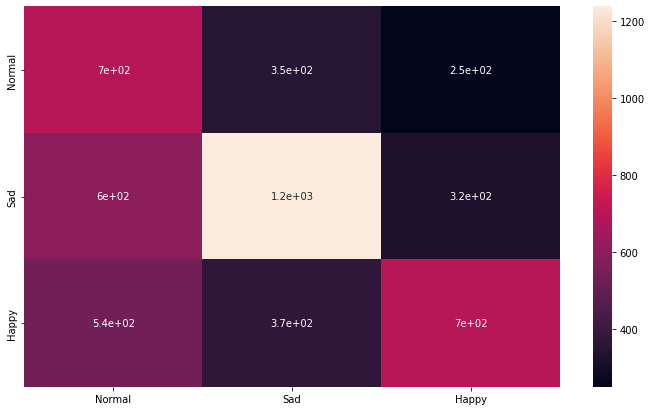

In [ ]:
cf_matrix = confusion_matrix(true_list, pred_list)
df_cm = pd.DataFrame(cf_matrix, index = ['Normal','Sad','Happy'],columns = ['Normal','Sad','Happy'])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

# Embedding Like Word2vec Using SVM & TF-IDF#

##Make This Embedding For Each Word in The Vocabulary##
Beacuse the vocabulary belongs to the train data, we used svm for each words in vocabulary with the help of train sentences. We took these steps for each word in the vocabulary to carry out this section:<br>
1- Find the sentences of train data that includes the target word.<br>
2- For each found sentence, we label the words(the columns related to the words) that are in the sentences by 1 and choose randomly words that are not present in the sentence and label them by 0(the number of the randomly chosen words equals to the number of words of the sentence.<br>
3- Perform SVM on the the words.<br>
4- Concatenate weights and bias to make the target word vector.<br>
5- Do the step 2,3,4 for all sentences that are the target word is present and average the word vectors of step 4.
Note: Step 4 means that if there are n documents in the train data, the word vector will be n+1 size.

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
torch.manual_seed(42)
svm_tf_idf_tensor = torch.zeros(len(tfidf.vocabulary_),len(tf_idf_tensor_train)+1)
for word_num in range(len(tfidf.vocabulary_)):
  sentences_index_word_exist = torch.nonzero(tf_idf_tensor_train[:,word_num])
  sentences_word_exist = tf_idf_tensor_train[sentences_index_word_exist.squeeze(1)]
  for sentence_word_exist in sentences_word_exist:
    word_near_words_indexes = torch.nonzero(sentence_word_exist).squeeze(1)
    if len(word_near_words_indexes)>1:
        near_words_indexes = word_near_words_indexes[word_near_words_indexes!=word_num]
        a = torch.arange(len(tfidf.vocabulary_))
        b =torch.randperm(len(tfidf.vocabulary_)- len(word_near_words_indexes))[:len(near_words_indexes)]
        d = torch.arange(len(tfidf.vocabulary_))
        d[word_near_words_indexes] = -1
        e = a[a==d]
        not_near_words = torch.transpose(tf_idf_tensor_train[:,e[b]], 0, 1)
        near_words = torch.transpose(tf_idf_tensor_train[:,near_words_indexes], 0, 1)
        near_not_near_words = torch.cat((near_words,not_near_words),0)
        word_labels = torch.zeros(len(near_not_near_words), dtype=torch.int64)
        word_labels[0:len(near_words)] = 1
        clf = LinearSVC()
        clf.fit(near_not_near_words, word_labels)
        svm_tf_idf_tensor[word_num] = svm_tf_idf_tensor[word_num] + torch.cat((torch.tensor(clf.coef_.squeeze(0),dtype=torch.float),torch.tensor(clf.intercept_,dtype=torch.float)),0)
  svm_tf_idf_tensor[word_num] = svm_tf_idf_tensor[word_num]/len(sentences_word_exist)


##Download The Words Vectors##
If you don't have time to run above cell, you can download the words vectors that are driven with the help of SVM and TF-IDF vectorization.

In [ ]:
!gdown 1-1GUxQqwR6Vr1umjFvlAW-9Vlrupug5d

Downloading...
From: https://drive.google.com/uc?id=1-1GUxQqwR6Vr1umjFvlAW-9Vlrupug5d
To: /content/svm_tf_idf_tensor.pt
100% 774M/774M [00:11<00:00, 66.5MB/s]


In [ ]:
svm_tf_idf_tensor = torch.load('/content/svm_tf_idf_tensor.pt')

##Use Word Vectors To Make the Train Documents (Sentences) Vectors##

In [ ]:
def svm_tf_idf_tensor_document_vectorizer(tf_idf_tensor):
  svm_tf_idf_doc_tensor = torch.zeros(len(tf_idf_tensor),svm_tf_idf_tensor.shape[-1])
  for doc_num in range(len(tf_idf_tensor)):
    if tf_idf_tensor[doc_num].any():
      doc_index_words_exist = torch.nonzero(tf_idf_tensor[doc_num])
      svm_tf_idf_doc_tensor[doc_num] = torch.sum(svm_tf_idf_tensor[doc_index_words_exist],0)/len(doc_index_words_exist)
  return svm_tf_idf_doc_tensor

In [ ]:
svm_tf_idf_doc_tensor_train = svm_tf_idf_tensor_document_vectorizer(tf_idf_tensor_train)

##Use Word Vectors To Make the Dev Documents (Sentences) Vectors##

In [ ]:
svm_tf_idf_doc_tensor_dev = svm_tf_idf_tensor_document_vectorizer(tf_idf_tensor_dev)


##Use Word Vectors To Make the Test Documents (Sentences) Vectors##

In [ ]:
svm_tf_idf_doc_tensor_test = svm_tf_idf_tensor_document_vectorizer(tf_idf_tensor_test)


##Creating SVM TF-IDF Dataset##

In [ ]:
del svm_tf_idf_tensor

In [ ]:
from torch.utils.data import TensorDataset
torch.manual_seed(42)

svm_tf_idf_training_data = TensorDataset(svm_tf_idf_doc_tensor_train,torch.tensor(training_data.df_sentiment[0]))

svm_tf_idf_dev_data = TensorDataset(svm_tf_idf_doc_tensor_dev,torch.tensor(dev_data.df_sentiment[0]))

svm_tf_idf_test_data = TensorDataset(svm_tf_idf_doc_tensor_test,torch.tensor(test_data.df_sentiment[0]))

##Evaluate SVM TF-IDF Embedding By LSTM Model##

In [ ]:
torch.manual_seed(42)
SVM_TF_IDF_LSTM = sentiment_lstm(input_size = len(tf_idf_tensor_train)+1,hidden_size = 100).to(device)

In [ ]:
torch.manual_seed(42)
SVM_TF_IDF_LSTM(torch.stack((svm_tf_idf_training_data[0][0],svm_tf_idf_training_data[1][0])).to(device))

tensor([[-0.0140,  0.0878,  0.0819],
        [-0.0206,  0.0837,  0.0780]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
from torch.utils.data import DataLoader
svm_tf_idf_train_dataloader = DataLoader(svm_tf_idf_training_data, batch_size=64, shuffle=True)  

svm_tf_idf_dev_dataloader = DataLoader(svm_tf_idf_dev_data, batch_size=64, shuffle=False)

svm_tf_idf_test_dataloader = DataLoader(svm_tf_idf_test_data, batch_size=64, shuffle=False)

##Training SVM TF-IDF Embedding By LSTM Model##

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
epochs = 10
optimizer = torch.optim.Adam(SVM_TF_IDF_LSTM.parameters(), lr = learning_rate)
val_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(svm_tf_idf_train_dataloader, SVM_TF_IDF_LSTM , loss_fn, optimizer)
    val_accuracy.append(test_loop(svm_tf_idf_dev_dataloader, SVM_TF_IDF_LSTM , loss_fn))
    if np.argmax(val_accuracy) ==len(val_accuracy)-1:
      torch.save(SVM_TF_IDF_LSTM ,' SVM_TF_IDF_LSTM.pth')
print("Done!")

Epoch 1
-------------------------------
loss: 1.108172  [    0/20240]
loss: 1.092758  [ 6400/20240]
loss: 1.080027  [12800/20240]
loss: 1.065704  [19200/20240]
Test Error: 
 Accuracy: 39.7%, Avg loss: 1.090896 

Epoch 2
-------------------------------
loss: 1.049005  [    0/20240]
loss: 1.050838  [ 6400/20240]
loss: 1.015488  [12800/20240]
loss: 0.955934  [19200/20240]
Test Error: 
 Accuracy: 46.8%, Avg loss: 1.041529 

Epoch 3
-------------------------------
loss: 0.966973  [    0/20240]
loss: 0.955746  [ 6400/20240]
loss: 0.969104  [12800/20240]
loss: 0.945819  [19200/20240]
Test Error: 
 Accuracy: 47.3%, Avg loss: 1.043234 

Epoch 4
-------------------------------
loss: 0.945465  [    0/20240]
loss: 0.985258  [ 6400/20240]
loss: 0.979649  [12800/20240]
loss: 1.040909  [19200/20240]
Test Error: 
 Accuracy: 45.5%, Avg loss: 1.064969 

Epoch 5
-------------------------------
loss: 0.922319  [    0/20240]
loss: 0.906380  [ 6400/20240]
loss: 0.932133  [12800/20240]
loss: 0.852149  [19200

##Download The Best SVM TF-IDF Embedding LSTM Model##
If you don't have time for training, you can run this section.

In [ ]:
!gdown 168ldjor9ezVNZjpDbLnOG0K7UFRabL1V

Downloading...
From: https://drive.google.com/uc?id=168ldjor9ezVNZjpDbLnOG0K7UFRabL1V
To: /content/SVM_TF_IDF_LSTM.pth
100% 32.6M/32.6M [00:00<00:00, 59.3MB/s]


##Acuuracy, F1 Score & Confusion Matrix of Test Data On The SVM TF-IDF Embedding LSTM Model##
Based on README file in the Github:<br>
positive(happy) label: 2<br>
negative(sad) label: 1<br>
neutral(normal) label:0

In [ ]:
SVM_TF_IDF_LSTM = torch.load('/content/SVM_TF_IDF_LSTM.pth')

In [ ]:
true_list, pred_list =test_condition(svm_tf_idf_test_dataloader, SVM_TF_IDF_LSTM)         

In [ ]:
loss_fn = nn.CrossEntropyLoss()
print(f"Accuracy of Test Set On SVM TF-IDF LSTM Model Is:{ test_loop(svm_tf_idf_test_dataloader, SVM_TF_IDF_LSTM, loss_fn)}")

Test Error: 
 Accuracy: 47.2%, Avg loss: 1.111124 

Accuracy of Test Set On SVM TF-IDF LSTM Model Is:0.4724689165186501


In [ ]:
print(f"micro F1 Score of Test Set On SVM TF-IDF LSTM Model Is:{f1_score(true_list, pred_list, average='micro')}")
print(f"macro F1 Score of Test Set On SVM TF-IDF LSTM Model Is:{f1_score(true_list, pred_list, average='macro')}")

micro F1 Score of Test Set On SVM TF-IDF LSTM Model Is:0.4724689165186501
macro F1 Score of Test Set On SVM TF-IDF LSTM Model Is:0.4606392687443097


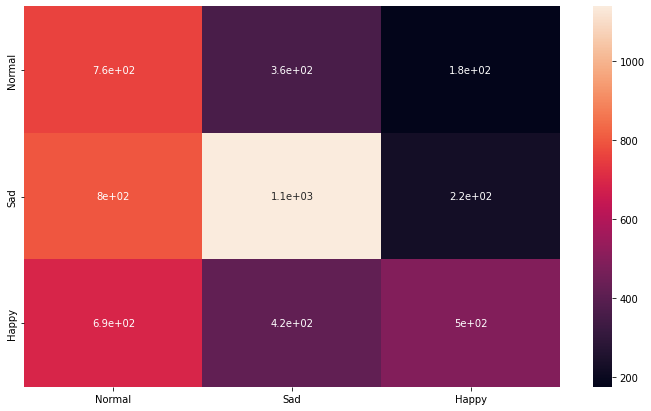

In [ ]:
cf_matrix = confusion_matrix(true_list, pred_list)
df_cm = pd.DataFrame(cf_matrix, index = ['Normal','Sad','Happy'],columns = ['Normal','Sad','Happy'])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

#Use Glove Embeddding On Train,Dev & Test Data#

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2023-02-09 08:34:34--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-02-09 08:34:34--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.12MB/s    in 2m 39s  

2023-02-09 08:37:14 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = torch.from_numpy(np.array(split_line[1:], dtype=np.float32))
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model
glove_model = load_glove_model('glove.6B.50d.txt')

Loading Glove Model
400000 words loaded!


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'(?u)\b\w\w+\b')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def doc_glove_embedding(docs):
  docs_tensor = torch.zeros(len(docs),50)
  for num_doc, doc in enumerate(docs):
    doc_tokens = tokenizer.tokenize(doc)
    if doc_tokens!=[]:
      for doc_token in doc_tokens:
        if doc_token in glove_model:
          docs_tensor[num_doc] += glove_model[doc_token]
      docs_tensor[num_doc]/=len(doc_tokens)
  return docs_tensor

In [ ]:
train_doc_glove_embedding = doc_glove_embedding(training_data.df_text[0])

In [ ]:
dev_doc_glove_embedding = doc_glove_embedding(dev_data.df_text[0])

In [ ]:
test_doc_glove_embedding = doc_glove_embedding(test_data.df_text[0])

##Creating Glove  Dataset##

In [ ]:
del glove_model

In [ ]:
from torch.utils.data import TensorDataset
torch.manual_seed(42)

glove_training_data = TensorDataset(train_doc_glove_embedding,torch.tensor(training_data.df_sentiment[0]))

glove_dev_data = TensorDataset(dev_doc_glove_embedding,torch.tensor(dev_data.df_sentiment[0]))

glove_test_data = TensorDataset(test_doc_glove_embedding,torch.tensor(test_data.df_sentiment[0]))

##Evaluate GLOVE Embedding By LSTM Model##

In [ ]:
torch.manual_seed(42)
GLOVE_LSTM = sentiment_lstm(input_size = 50 ,hidden_size = 100).to(device)

In [ ]:
torch.manual_seed(42)
GLOVE_LSTM(torch.stack((glove_training_data[0][0],glove_training_data[1][0])).to(device))

tensor([[-0.0630, -0.0200, -0.0723],
        [-0.0757, -0.0294, -0.0945]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
from torch.utils.data import DataLoader
glove_train_dataloader = DataLoader(glove_training_data, batch_size=64, shuffle=True)  

glove_dev_dataloader = DataLoader(glove_dev_data, batch_size=64, shuffle=False)

glove_test_dataloader = DataLoader(glove_test_data, batch_size=64, shuffle=False)

##Training GLOVE Embedding By LSTM Model##

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
epochs = 10
optimizer = torch.optim.Adam(GLOVE_LSTM.parameters(), lr = learning_rate)
val_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(glove_train_dataloader, GLOVE_LSTM , loss_fn, optimizer)
    val_accuracy.append(test_loop(glove_dev_dataloader, GLOVE_LSTM , loss_fn))
    if np.argmax(val_accuracy) ==len(val_accuracy)-1:
      torch.save(GLOVE_LSTM ,' GLOVE_LSTM.pth')
      torch.save(GLOVE_LSTM ,'/content/drive/MyDrive/Project/GLOVE_LSTM.pth')
print("Done!")

Epoch 1
-------------------------------
loss: 1.097212  [    0/20240]
loss: 1.115091  [ 6400/20240]
loss: 0.991509  [12800/20240]
loss: 1.035328  [19200/20240]
Test Error: 
 Accuracy: 45.6%, Avg loss: 1.049038 

Epoch 2
-------------------------------
loss: 1.026632  [    0/20240]
loss: 0.977234  [ 6400/20240]
loss: 1.000106  [12800/20240]
loss: 0.992207  [19200/20240]
Test Error: 
 Accuracy: 48.6%, Avg loss: 1.020299 

Epoch 3
-------------------------------
loss: 1.025551  [    0/20240]
loss: 1.060637  [ 6400/20240]
loss: 0.991202  [12800/20240]
loss: 0.956163  [19200/20240]
Test Error: 
 Accuracy: 48.8%, Avg loss: 1.020522 

Epoch 4
-------------------------------
loss: 0.889037  [    0/20240]
loss: 1.068786  [ 6400/20240]
loss: 1.082662  [12800/20240]
loss: 1.024280  [19200/20240]
Test Error: 
 Accuracy: 49.0%, Avg loss: 1.016214 

Epoch 5
-------------------------------
loss: 0.942764  [    0/20240]
loss: 0.998592  [ 6400/20240]
loss: 1.008845  [12800/20240]
loss: 0.914535  [19200

##Download The Best GLOVE LSTM Model##

In [ ]:
!gdown 1ytfFzdAIsUbG-marJ1Jp7RvQqSMCPRrB

Downloading...
From: https://drive.google.com/uc?id=1ytfFzdAIsUbG-marJ1Jp7RvQqSMCPRrB
To: /content/GLOVE_LSTM.pth
100% 65.7M/65.7M [00:00<00:00, 138MB/s]


##Acuuracy, F1 Score & Confusion Matrix of Test Data On The GLOVE Embedding LSTM Model##
Based on README file in the Github:<br>
positive(happy) label: 2<br>
negative(sad) label: 1<br>
neutral(normal) label:0

In [ ]:
GLOVE_LSTM = torch.load('/content/GLOVE_LSTM.pth')

In [ ]:
true_list, pred_list =test_condition(glove_test_dataloader, GLOVE_LSTM)         

In [ ]:
loss_fn = nn.CrossEntropyLoss()
print(f"Accuracy of Test Set On The GLOVE LSTM Model Is:{ test_loop(glove_test_dataloader, GLOVE_LSTM, loss_fn)}")

Test Error: 
 Accuracy: 49.9%, Avg loss: 1.015458 

Accuracy of Test Set On The GLOVE LSTM Model Is:0.499309255970002


In [ ]:
print(f"micro F1 Score of Test Set On The GLOVE LSTM Model Is:{f1_score(true_list, pred_list, average='micro')}")
print(f"macro F1 Score of Test Set On The GLOVE LSTM Model Is:{f1_score(true_list, pred_list, average='macro')}")

micro F1 Score of Test Set On The GLOVE LSTM Model Is:0.499309255970002
macro F1 Score of Test Set On The GLOVE LSTM Model Is:0.4866793370360147


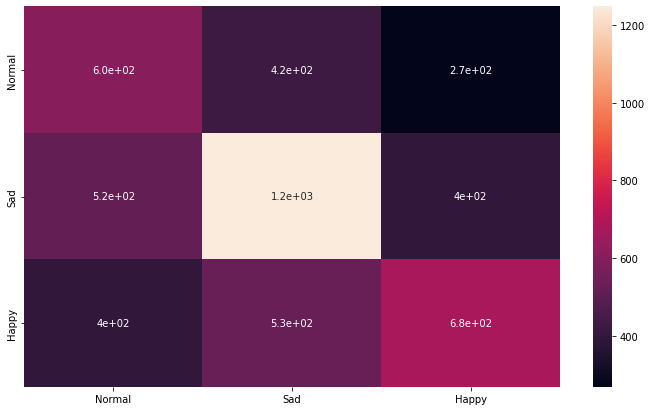

In [ ]:
cf_matrix = confusion_matrix(true_list, pred_list)
df_cm = pd.DataFrame(cf_matrix, index = ['Normal','Sad','Happy'],columns = ['Normal','Sad','Happy'])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

#BERT Model#
We used BERT model on 2 ways:<br>
1- Linear  Tunning: We freezed all layers except the last linear layer (BERT pooler) and just update the linear layer.<br>
2- Fine Tunning

##BERT Tokenizer##

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.1 MB/s eta 0:00:00


In [ ]:
from transformers import AutoConfig, AutoTokenizer, AutoModel

config = AutoConfig.from_pretrained("bert-base-cased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
max_doc_length = 0
my_doc_df_list = []
for my_doc in training_data.df_text[0]:# We use only training_data for achieving the max_doc_length to avoid information leaking

        max_doc_length = max(max_doc_length, len(tokenizer.encode(my_doc, add_special_tokens=True)))

max_doc_length 

28

In [ ]:
def my_doc_bert_tokenizer( my_doc_df):
        input_ids = []
        attention_masks = []
        for my_doc in my_doc_df:
          encoded_dict = tokenizer.encode_plus(
                            my_doc,                      
                            add_special_tokens = True, 
                            truncation=True,
                            max_length = max_doc_length  ,    
                            pad_to_max_length = True,
                            return_attention_mask = True, 
                            return_tensors = 'pt',   
                    )
        
          input_ids.append(encoded_dict['input_ids'])
          attention_masks.append(encoded_dict['attention_mask'])
        return  torch.cat(input_ids, dim=0),torch.cat(attention_masks, dim=0)

In [ ]:
train_input_ids,train_attention_masks = my_doc_bert_tokenizer(training_data.df_text[0])

In [ ]:
dev_input_ids,dev_attention_masks = my_doc_bert_tokenizer(dev_data.df_text[0])

In [ ]:
test_input_ids,test_attention_masks = my_doc_bert_tokenizer(test_data.df_text[0])

##Creating BERT Dataset##

In [ ]:
from torch.utils.data import TensorDataset
torch.manual_seed(42)
bert_training_data = TensorDataset(train_input_ids, train_attention_masks, torch.tensor(training_data.df_sentiment[0]))
bert_dev_data = TensorDataset(dev_input_ids, dev_attention_masks, torch.tensor(dev_data.df_sentiment[0]))
bert_test_data = TensorDataset(test_input_ids, test_attention_masks, torch.tensor(test_data.df_sentiment[0]))

##BERT Linear Tunning##

In [ ]:
from transformers import BertForSequenceClassification, BertConfig
from prettytable import PrettyTable
import torch.nn as nn
def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
bert_linear_tunning = AutoModel.from_pretrained("bert-base-cased")
for param in bert_linear_tunning.parameters():
    param.requires_grad = False
bert_linear_tunning.pooler = nn.Linear(768, 3)
bert_linear_tunning.to(device)
params = count_parameters(bert_linear_tunning)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


+---------------+------------+
|    Modules    | Parameters |
+---------------+------------+
| pooler.weight |    2304    |
|  pooler.bias  |     3      |
+---------------+------------+
Total Trainable Params: 2307


In [ ]:
def bert_linear_train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, data in enumerate(dataloader):
        input_ids = data[0].to(device)
        input_mask = data[1].to(device)
        labels = data[2].to(device)
        input_ids = input_ids.to(device)
        input_mask = input_mask.to(device)
        labels = labels.to(device)

        pred = model(input_ids).pooler_output.permute((1, 0, 2))[0]
        loss = loss_fn(pred, labels) 

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(input_ids)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def bert_linear_test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for data in dataloader:
            input_ids = data[0].to(device)
            input_mask = data[1].to(device)
            labels = data[2].to(device)
            input_ids = input_ids.to(device)
            input_mask = input_mask.to(device)
            labels = labels.to(device)
            model.eval()

            pred = model(input_ids).pooler_output.permute((1, 0, 2))[0]
            test_loss += loss_fn(pred, labels).item()
            correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

In [ ]:
from torch.utils.data import DataLoader

bert_train_dataloader = DataLoader(bert_training_data, batch_size=64, shuffle=True)  

bert_dev_dataloader = DataLoader(bert_dev_data, batch_size=64, shuffle=False)

bert_test_dataloader = DataLoader(bert_test_data, batch_size=64, shuffle=False)

###Linear Tunning BERT Model###

In [ ]:
torch.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
epochs = 10
optimizer = torch.optim.Adam(bert_linear_tunning.parameters(), lr = learning_rate)
val_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    bert_linear_train_loop(bert_train_dataloader, bert_linear_tunning , loss_fn, optimizer)
    val_accuracy.append(bert_linear_test_loop(bert_dev_dataloader, bert_linear_tunning , loss_fn))
    if np.argmax(val_accuracy) ==len(val_accuracy)-1:
      torch.save(bert_linear_tunning ,'bert_linear_tunning.pth')
      torch.save(bert_linear_tunning ,'/content/drive/MyDrive/Project/bert_linear_tunning.pth')
print("Done!")

Epoch 1
-------------------------------
loss: 1.282897  [    0/20240]
loss: 1.120616  [ 6400/20240]
loss: 0.919659  [12800/20240]
loss: 0.944549  [19200/20240]
Test Error: 
 Accuracy: 53.7%, Avg loss: 0.964760 

Epoch 2
-------------------------------
loss: 0.870523  [    0/20240]
loss: 0.885411  [ 6400/20240]
loss: 0.931703  [12800/20240]
loss: 0.815661  [19200/20240]
Test Error: 
 Accuracy: 57.2%, Avg loss: 0.921809 

Epoch 3
-------------------------------
loss: 0.820066  [    0/20240]
loss: 0.946124  [ 6400/20240]
loss: 1.001510  [12800/20240]
loss: 0.813668  [19200/20240]
Test Error: 
 Accuracy: 56.5%, Avg loss: 0.927276 

Epoch 4
-------------------------------
loss: 0.837664  [    0/20240]
loss: 0.982586  [ 6400/20240]
loss: 0.937831  [12800/20240]
loss: 0.985105  [19200/20240]
Test Error: 
 Accuracy: 56.0%, Avg loss: 0.939641 

Epoch 5
-------------------------------
loss: 0.834927  [    0/20240]
loss: 0.905164  [ 6400/20240]
loss: 0.974478  [12800/20240]
loss: 0.770980  [19200

###Download The Best Linear Tuned BERT Model###
If you don't have time for training, you can run this section.

In [ ]:
!gdown 1--Auc0GTOyrai0QuuPDomlqWtA-50l3u

Downloading...
From: https://drive.google.com/uc?id=1--Auc0GTOyrai0QuuPDomlqWtA-50l3u
To: /content/bert_linear_tunning.pth
100% 431M/431M [00:02<00:00, 156MB/s]


###Acuuracy, F1 Score & Confusion Matrix of Test Data On The Linear Tuned BERT Model###
Based on README file in the Github:<br>
positive(happy) label: 2<br>
negative(sad) label: 1<br>
neutral(normal) label:0

In [ ]:
bert_linear_tunning = torch.load('bert_linear_tunning.pth')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def bert_linear_test_condition(dataloader, model):
         pred_list=[]
         true_list=[]
         with torch.no_grad():
          for data in dataloader:
              input_ids = data[0].to(device)
              input_mask = data[1].to(device)
              labels = data[2].to(device)
              input_ids = input_ids.to(device)
              input_mask = input_mask.to(device)
              labels = labels.to(device)
              model.eval()
              pred = model(input_ids).pooler_output.permute((1, 0, 2))[0]

              pred_list.extend(pred.argmax(1).data.cpu().numpy())
              true_list.extend(labels.data.cpu().numpy())
          return  true_list, pred_list
true_list, pred_list = bert_linear_test_condition(bert_test_dataloader, bert_linear_tunning)         

In [ ]:
loss_fn = nn.CrossEntropyLoss()
print(f"Accuracy of Test Set On Linear Tuned BERT Model Is:{ bert_linear_test_loop(bert_test_dataloader, bert_linear_tunning, loss_fn)}")

Test Error: 
 Accuracy: 59.0%, Avg loss: 0.904046 

Accuracy of Test Set On Linear Tuned BERT Model Is:0.5902901124925992


In [ ]:
print(f"micro F1 Score of Test Set On Linear Tuned BERT Model Is:{f1_score(true_list, pred_list, average='micro')}")
print(f"macro F1 Score of Test Set On Linear Tuned BERT Model Is:{f1_score(true_list, pred_list, average='macro')}")

micro F1 Score of Test Set On Linear Tuned BERT Model Is:0.5902901124925992
macro F1 Score of Test Set On Linear Tuned BERT Model Is:0.5759264989814415


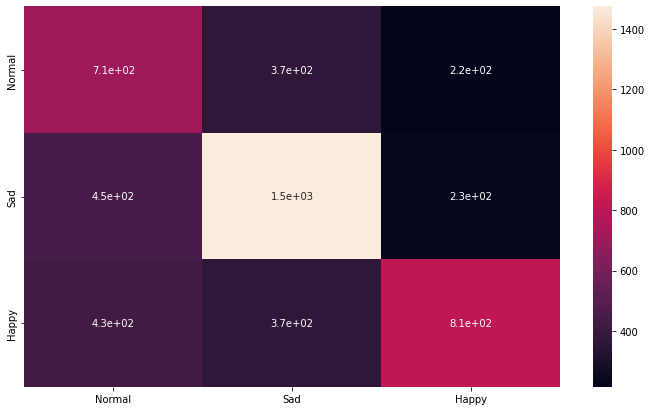

In [ ]:
cf_matrix = confusion_matrix(true_list, pred_list)
df_cm = pd.DataFrame(cf_matrix, index = ['Normal','Sad','Happy'],columns = ['Normal','Sad','Happy'])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

##BERT Fine Tunning##

In [ ]:
bert_fine_tunning = BertForSequenceClassification.from_pretrained(
    "bert-base-cased", 
    num_labels = 3, 
    output_attentions = False, 
    output_hidden_states = False)
bert_fine_tunning.to(device)
params = count_parameters(bert_fine_tunning)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

+---------------------------------------------------------+------------+
|                         Modules                         | Parameters |
+---------------------------------------------------------+------------+
|          bert.embeddings.word_embeddings.weight         |  22268928  |
|        bert.embeddings.position_embeddings.weight       |   393216   |
|       bert.embeddings.token_type_embeddings.weight      |    1536    |
|             bert.embeddings.LayerNorm.weight            |    768     |
|              bert.embeddings.LayerNorm.bias             |    768     |
|     bert.encoder.layer.0.attention.self.query.weight    |   589824   |
|      bert.encoder.layer.0.attention.self.query.bias     |    768     |
|      bert.encoder.layer.0.attention.self.key.weight     |   589824   |
|       bert.encoder.layer.0.attention.self.key.bias      |    768     |
|     bert.encoder.layer.0.attention.self.value.weight    |   589824   |
|      bert.encoder.layer.0.attention.self.value.bi

In [ ]:
def bert_fine_train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, data in enumerate(dataloader):
        input_ids = data[0].to(device)
        input_mask = data[1].to(device)
        labels = data[2].to(device)
        input_ids = input_ids.to(device)
        input_mask = input_mask.to(device)
        labels = labels.to(device)

        loss = model(input_ids, 
                    token_type_ids=None, 
                    attention_mask=input_mask, 
                    labels=labels).loss
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(input_ids)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def bert_fine_test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for data in dataloader:
            input_ids = data[0].to(device)
            input_mask = data[1].to(device)
            labels = data[2].to(device)
            input_ids = input_ids.to(device)
            input_mask = input_mask.to(device)
            labels = labels.to(device)


            loss = model(input_ids, 
                    token_type_ids=None, 
                    attention_mask=input_mask, 
                    labels=labels).loss
            pred = model(input_ids, 
                    token_type_ids=None, 
                    attention_mask=input_mask, 
                    labels=labels).logits

            test_loss += loss_fn(pred, labels).item()
            correct += (pred.argmax(1).flatten() == labels.flatten()).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

In [ ]:
from torch.utils.data import DataLoader

bert_train_dataloader = DataLoader(bert_training_data, batch_size=64, shuffle=True)  

bert_dev_dataloader = DataLoader(bert_dev_data, batch_size=64, shuffle=False)

bert_test_dataloader = DataLoader(bert_test_data, batch_size=64, shuffle=False)

In [ ]:
torch.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-5
epochs = 5
optimizer = torch.optim.Adam(bert_fine_tunning.parameters(), lr = learning_rate)
val_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    bert_fine_train_loop(bert_train_dataloader, bert_fine_tunning , loss_fn, optimizer)
    val_accuracy.append(bert_fine_test_loop(bert_dev_dataloader, bert_fine_tunning , loss_fn))
    if np.argmax(val_accuracy) ==len(val_accuracy)-1:
      torch.save(bert_fine_tunning ,'bert_fine_tunning.pth')
      torch.save(bert_fine_tunning ,'/content/drive/MyDrive/Project/bert_fine_tunning.pth')
print("Done!")

Epoch 1
-------------------------------
loss: 1.224653  [    0/20240]
loss: 1.035179  [ 6400/20240]
loss: 0.721202  [12800/20240]
loss: 0.789900  [19200/20240]
Test Error: 
 Accuracy: 61.1%, Avg loss: 0.853773 

Epoch 2
-------------------------------
loss: 0.643365  [    0/20240]
loss: 0.755453  [ 6400/20240]
loss: 0.802295  [12800/20240]
loss: 0.546635  [19200/20240]
Test Error: 
 Accuracy: 62.1%, Avg loss: 0.854145 

Epoch 3
-------------------------------
loss: 0.648189  [    0/20240]
loss: 0.730890  [ 6400/20240]
loss: 0.672986  [12800/20240]
loss: 0.684992  [19200/20240]
Test Error: 
 Accuracy: 61.2%, Avg loss: 0.885086 

Epoch 4
-------------------------------
loss: 0.562621  [    0/20240]
loss: 0.610081  [ 6400/20240]
loss: 0.756176  [12800/20240]
loss: 0.549681  [19200/20240]
Test Error: 
 Accuracy: 61.3%, Avg loss: 0.920839 

Epoch 5
-------------------------------
loss: 0.438824  [    0/20240]
loss: 0.531202  [ 6400/20240]
loss: 0.707539  [12800/20240]
loss: 0.387119  [19200

###Download The Best Fine Tuned BERT Model###
If you don't have time for training, you can run this section.

In [ ]:
!gdown 1-1T_pLNN9Pq6N5yq--571SOCCZHGscUp

Downloading...
From: https://drive.google.com/uc?id=1-1T_pLNN9Pq6N5yq--571SOCCZHGscUp
To: /content/bert_fine_tunning.pth
100% 433M/433M [00:02<00:00, 198MB/s]


###Acuuracy, F1 Score & Confusion Matrix of Test Data On The Fine Tuned BERT Model###
Based on README file in the Github:<br>
positive(happy) label: 2<br>
negative(sad) label: 1<br>
neutral(normal) label:0

In [ ]:
bert_fine_tunning = torch.load('/content/bert_fine_tunning.pth')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def bert_fine_test_condition(dataloader, model):
         pred_list=[]
         true_list=[]
         model.eval()
         with torch.no_grad():
          for data in dataloader:
              input_ids = data[0].to(device)
              input_mask = data[1].to(device)
              labels = data[2].to(device)
              input_ids = input_ids.to(device)
              input_mask = input_mask.to(device)
              labels = labels.to(device)
              pred = model(input_ids, 
                    token_type_ids=None, 
                    attention_mask=input_mask, 
                    labels=labels).logits

              pred_list.extend(pred.argmax(1).flatten().data.cpu().numpy())
              true_list.extend(labels.flatten().data.cpu().numpy())
          return  true_list, pred_list
true_list, pred_list = bert_fine_test_condition(bert_test_dataloader, bert_fine_tunning)         

In [ ]:
loss_fn = nn.CrossEntropyLoss()
print(f"Accuracy of Test Set On Fine Tuned BERT Model Is:{ bert_fine_test_loop(bert_test_dataloader, bert_fine_tunning, loss_fn)}")

Test Error: 
 Accuracy: 62.4%, Avg loss: 0.872981 

Accuracy of Test Set On Fine Tuned BERT Model Is:0.6240378922439314


In [ ]:
print(f"micro F1 Score of Test Set On Fine Tuned BERT Model Is:{f1_score(true_list, pred_list, average='micro')}")
print(f"macro F1 Score of Test Set On Fine Tuned BERT Model Is:{f1_score(true_list, pred_list, average='macro')}")

micro F1 Score of Test Set On Fine Tuned BERT Model Is:0.6240378922439314
macro F1 Score of Test Set On Fine Tuned BERT Model Is:0.6124856432847099


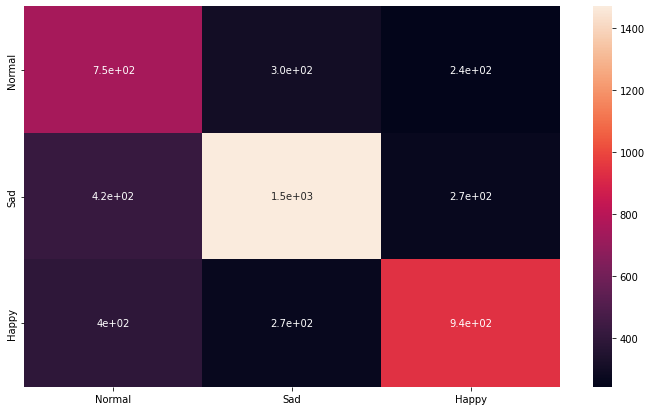

In [ ]:
cf_matrix = confusion_matrix(true_list, pred_list)
df_cm = pd.DataFrame(cf_matrix, index = ['Normal','Sad','Happy'],columns = ['Normal','Sad','Happy'])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

#Analysis of The Results#
The Fine Tuned BERT Model gives the best accuracy on Test Data (62.4%). So, We use this model in phase 3 as the best model for the text modality.